<h1 style="color:skyblue;">Health Risk Category Classification (Classification Task) </h1>

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df=pd.read_csv("ML101_train_dataset.csv")

In [58]:
numeric_cols = df.select_dtypes(include=['float']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_category = df[col].mode()[0]
    df[col].fillna(mode_category, inplace=True)

<h2 style="color:orange;">After fitting the data performed OneHotEncoding on 'Gender' column</h2>

In [59]:
new2 = pd.get_dummies(df,columns=['Gender'])
new2['Gender_Female'] = new2['Gender_Female'].astype(int)
new2['Gender_Male'] = new2['Gender_Male'].astype(int)

In [60]:
new2

,Average Daily Steps,Hours of Sleep,Caloric Intake,Age,Height,Weight,Cholesterol level,Blood Sugar level,Systolic BP,Diastolic BP,LifeStyle,Gender_Female,Gender_Male
0,15725.000000,6.518042,1714.0,56.000000,178.416872,75.489346,185.408550,104.442836,172.813045,75.552416,Average,0,1
1,6733.000000,9.176300,2508.0,69.000000,176.826592,54.635484,191.698148,104.851888,198.729261,-103.634282,Average,1,0
2,7424.000000,4.856772,1366.0,46.000000,182.281966,63.578372,212.625051,106.649132,172.905053,87.816911,Bad,0,1
3,11853.000000,9.727244,2189.0,32.000000,168.520316,59.397202,205.440351,121.982302,204.527361,99.791603,Bad,1,0
4,7521.000000,6.433183,2342.0,48.526844,145.273232,62.574740,161.368583,126.408787,187.882666,88.240932,Average,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2265.000000,7.005729,2030.0,53.000000,182.202253,65.035350,212.133380,115.360556,348.653753,88.464038,Bad,0,1
99996,10959.000000,9.661165,2233.0,22.000000,185.802297,63.457075,227.699267,112.321197,205.758576,97.740461,Good,0,1
99997,10497.616889,7.378317,2080.0,37.000000,168.520316,41.227254,224.300704,121.369845,195.905161,-107.061245,Good,0,1
99998,12110.000000,9.843323,1434.0,72.000000,155.025779,106.908491,140.865132,94.524506,149.675364,200.964967,Great,1,0


<h2 style="color:orange;">As the Data Contained too much Outliers, tried filling most with median</h2>

In [61]:
def fix_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    dataframe[column] = dataframe[column].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)
    
cols_fix = ['Height', 'Weight', 'Cholesterol level', 'Blood Sugar level',
       'Systolic BP', 'Diastolic BP']
for column in cols_fix:
    fix_outliers_iqr(new2, column)
X_train=new2.drop(columns=['LifeStyle'])
Y_train=new2.iloc[:,-3]

In [62]:
X_train

,Average Daily Steps,Hours of Sleep,Caloric Intake,Age,Height,Weight,Cholesterol level,Blood Sugar level,Systolic BP,Diastolic BP,Gender_Female,Gender_Male
0,15725.000000,6.518042,1714.0,56.000000,178.416872,75.489346,185.408550,104.442836,172.813045,75.552416,0,1
1,6733.000000,9.176300,2508.0,69.000000,176.826592,54.635484,191.698148,104.851888,198.729261,39.959053,1,0
2,7424.000000,4.856772,1366.0,46.000000,182.281966,63.578372,212.625051,106.649132,172.905053,87.816911,0,1
3,11853.000000,9.727244,2189.0,32.000000,168.520316,59.397202,205.440351,121.982302,204.527361,99.791603,1,0
4,7521.000000,6.433183,2342.0,48.526844,145.273232,62.574740,161.368583,126.408787,187.882666,88.240932,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2265.000000,7.005729,2030.0,53.000000,182.202253,65.035350,212.133380,115.360556,302.149573,88.464038,0,1
99996,10959.000000,9.661165,2233.0,22.000000,185.802297,63.457075,227.699267,112.321197,205.758576,97.740461,0,1
99997,10497.616889,7.378317,2080.0,37.000000,168.520316,41.227254,224.300704,121.369845,195.905161,39.959053,0,1
99998,12110.000000,9.843323,1434.0,72.000000,155.025779,105.499318,140.865132,94.524506,149.675364,148.446168,1,0


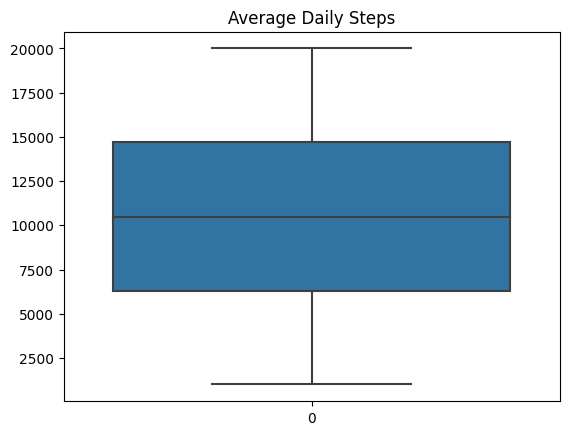

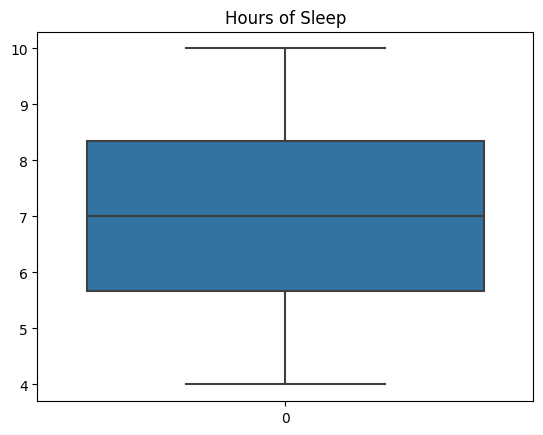

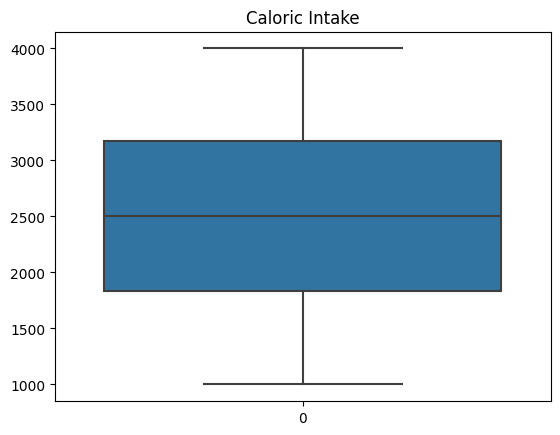

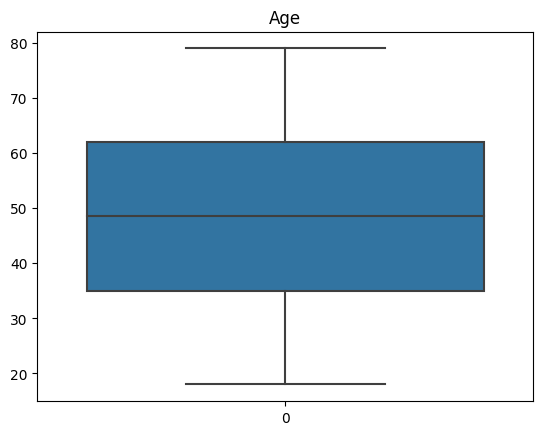

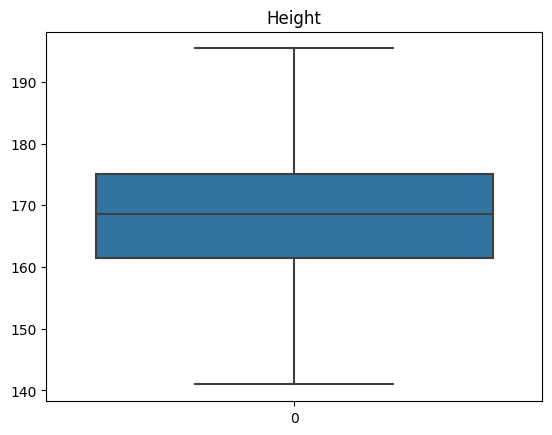

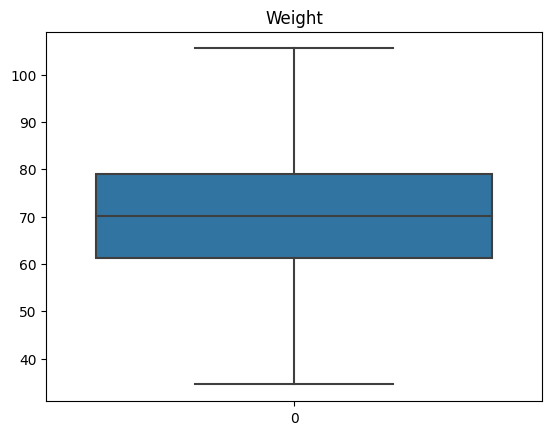

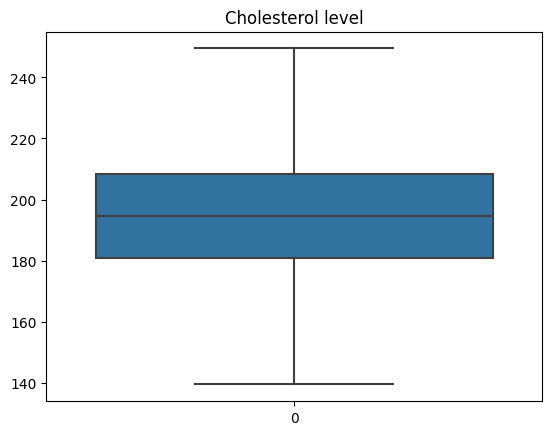

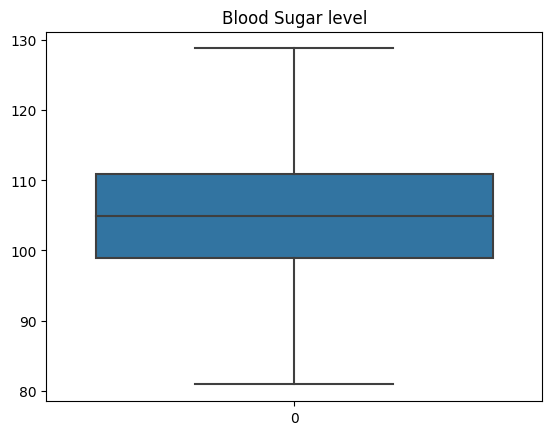

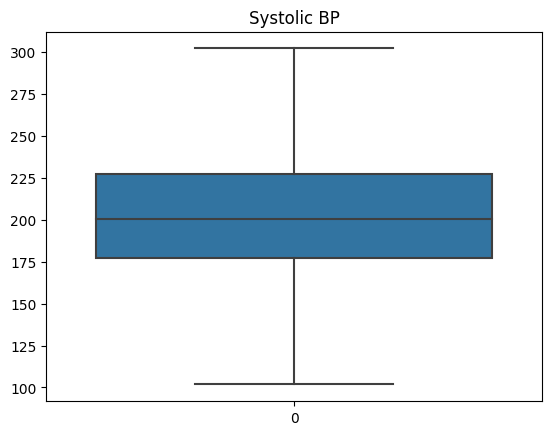

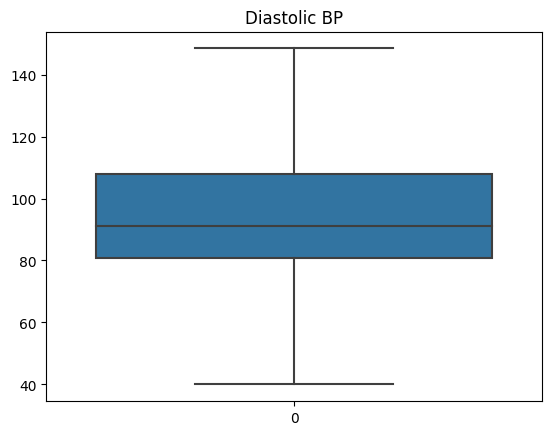

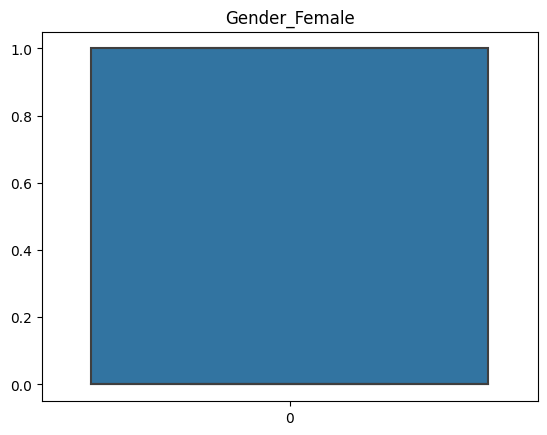

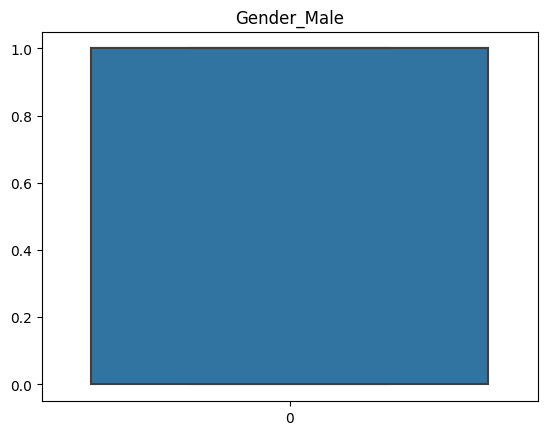

In [63]:
for i in X_train:
    sns.boxplot(X_train[i])
    plt.title(i)
    plt.show()

<h2 style="color:orange;">For basic testing did Test_Train_Split and checked for various Classification Algorithms </h2>

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train.drop(columns=['Systolic BP','Diastolic BP']),Y_train,test_size=0.3,shuffle=True)

### KNN for Classification

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors=11)
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [66]:
Y_pred=knn1.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_pred)

0.6576333333333333

### Tried Naive Bayes and Got A Better Result

In [68]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
ypred1=gnb.predict(x_test)
accuracy_score(y_test,ypred1)

0.7074666666666667

<h2 style="color:orange;">Now Doing the Final Training on Whole Training Data and Predicting for Test Data</h2>

In [69]:
test=pd.read_csv('ML101_dataset_test_feature.csv')
test=pd.get_dummies(test,columns=['Gender'])

In [70]:
gnb1=GaussianNB()
gnb1.fit(X_train.drop(columns=['Systolic BP','Diastolic BP']),Y_train)


GaussianNB()

In [71]:
Y_pred=gnb1.predict(test)

In [72]:
id=np.arange(0,test.shape[0])
data = {'ID': id, 'LifeStyle': Y_pred}
df = pd.DataFrame(data)
csv_file_path = 'BitbyBit.csv'

# Write the DataFrame to a CSV file
df.to_csv('BitbyBitClassification.csv',index=False)